# Scrapping  Twitter Pemilu 2024 using tweet-harvers


## Data Gathers Twitter

In [9]:
!pip uninstall nltk

^C


In [10]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
# # Install Node.js (because tweet-harvest built using Node.js)
# !sudo apt-get update
# !sudo apt-get install -y ca-certificates curl gnupg
# !sudo mkdir -p /etc/apt/keyrings
# !curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

# !NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

# !sudo apt-get update
# !sudo apt-get install nodejs -y

# !node -v

In [5]:
# # Crawl Data

# filename = 'pemilu.csv'
# search_keyword = '#DebatCapres until:2024-01-08 since:2024-01-06'
# limit = 3000

# !npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

## Import Library

In [12]:
import pandas as pd
import nltk, re, string

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn import naive_bayes

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

from nlp_id.lemmatizer import Lemmatizer

from langdetect import detect

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

## Load Dataset

In [ ]:
data = pd.read_csv('DataTweetFix.csv')

display(data)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.758140e+18,Thu Feb 15 14:45:30 +0000 2024,7,Caleg Sistem Paylater Yang Penting DP Dulu... ...,1.758140e+18,https://pbs.twimg.com/media/GGYrc6ubYAAJa8w.jpg,NaN,in,"DKI Jakarta, Indonesia",2,2,2,https://x.com/AchmadAnnama/status/175814048325...,1.196081e+08,AchmadAnnama
1,1.758140e+18,Thu Feb 15 14:51:22 +0000 2024,94,Anies menegaskan misi yang besar itu ialah mem...,1.758140e+18,https://pbs.twimg.com/ext_tw_video_thumb/17581...,NaN,in,"Jakarta, Indonesia",1,5,23,https://x.com/republikaonline/status/175814195...,2.212690e+07,republikaonline
2,1.758100e+18,Thu Feb 15 12:00:02 +0000 2024,0,Link dan cara cek real count pemilu 2024 resmi...,1.758100e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,0,https://x.com/medcom_id/status/175809884275753...,9.028380e+17,medcom_id
3,1.758110e+18,Thu Feb 15 13:00:02 +0000 2024,0,Investasinya selama ini gimana nih Pak Hary Ta...,1.758110e+18,https://pbs.twimg.com/media/GGXRfTVakAAzrXr.jpg,NaN,in,"Jakarta, Indonesia",0,1,0,https://x.com/pinterpolitik/status/17581139412...,7.987710e+17,pinterpolitik
4,1.758110e+18,Thu Feb 15 13:00:01 +0000 2024,0,KPU sebut 668 TPS berpotensi melakukan pemungu...,1.758110e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,1,https://x.com/medcom_id/status/175811393662737...,9.028380e+17,medcom_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1.795590e+18,Tue May 28 22:37:33 +0000 2024,0,Dari 18 partai politik peserta Pemilu 2024 han...,1.795590e+18,NaN,NaN,in,Jakarta,0,1,0,https://x.com/kompascom/status/179558523007156...,2.334396e+07,kompascom
2079,1.796450e+18,Fri May 31 07:41:14 +0000 2024,2,Kursi Partai di DPRD Sumatera Utara Hasil Pemi...,1.796450e+18,NaN,NaN,in,NaN,1,0,0,https://x.com/CNNIndonesia/status/179644682794...,1.712898e+07,CNNIndonesia
2080,1.796010e+18,Thu May 30 02:29:50 +0000 2024,4,Anggota Parlemen Israel Sebut Netanyahu Gagal ...,1.796010e+18,NaN,NaN,in,"Kota Surabaya, Jawa Timur",0,1,3,https://x.com/e100ss/status/1796006072702136733,8.486146e+08,e100ss
2081,1.795010e+18,Mon May 27 08:12:06 +0000 2024,2,Aswanto mengungkapkan bahwa seseorang mesti me...,1.795010e+18,NaN,NaN,in,Jakarta,0,0,0,https://x.com/kompascom/status/179500504371398...,2.334396e+07,kompascom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      2083 non-null   float64
 1   created_at               2083 non-null   object 
 2   favorite_count           2083 non-null   int64  
 3   full_text                2083 non-null   object 
 4   id_str                   2083 non-null   float64
 5   image_url                982 non-null    object 
 6   in_reply_to_screen_name  128 non-null    object 
 7   lang                     2083 non-null   object 
 8   location                 1550 non-null   object 
 9   quote_count              2083 non-null   int64  
 10  reply_count              2083 non-null   int64  
 11  retweet_count            2083 non-null   int64  
 12  tweet_url                2083 non-null   object 
 13  user_id_str              2083 non-null   float64
 14  username                

In [ ]:
data.shape

(2083, 15)

In [ ]:
data.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  1101
in_reply_to_screen_name    1955
lang                          0
location                    533
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [ ]:
data.duplicated().sum()

394

## Data Cleansing

In [ ]:
data = data[['created_at', 'username', 'full_text']]

data.head(10)

,created_at,username,full_text
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,Caleg Sistem Paylater Yang Penting DP Dulu... ...
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,Anies menegaskan misi yang besar itu ialah mem...
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,Link dan cara cek real count pemilu 2024 resmi...
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,Investasinya selama ini gimana nih Pak Hary Ta...
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,KPU sebut 668 TPS berpotensi melakukan pemungu...
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,Anies Konsisten di Gerakan Perubahan Ganjar Pe...
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,Respons Ganjar soal Hasil Quick Count: Suara P...
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,Menurut kalian faktor mana nih yang buat Prabo...
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,CEK FAKTA! Klik link https://t.co/S6tdYN1YEf u...
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,Anjay mantan Bupati Pati 2 periode suaranya me...


In [ ]:
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return 'unknown'

data['Language'] = data['full_text'].apply(detect_language)

data = data[data['Language'] == 'id']

In [ ]:
data.head(10)

,created_at,username,full_text,Language
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,Anies menegaskan misi yang besar itu ialah mem...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,Investasinya selama ini gimana nih Pak Hary Ta...,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,KPU sebut 668 TPS berpotensi melakukan pemungu...,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,Anies Konsisten di Gerakan Perubahan Ganjar Pe...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,Respons Ganjar soal Hasil Quick Count: Suara P...,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,Menurut kalian faktor mana nih yang buat Prabo...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,CEK FAKTA! Klik link https://t.co/S6tdYN1YEf u...,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,Anjay mantan Bupati Pati 2 periode suaranya me...,id
10,Thu Feb 15 23:44:00 +0000 2024,pinterpolitik,Apakah kalian sepakat bahwa kritikan ke Jokowi...,id
11,Thu Feb 15 12:54:00 +0000 2024,officialntv_,Sempat Bikin Khawatir Pemilu 2024 Ternyata Mal...,id


## Slang Word Changes

In [ ]:
df_slang = pd.read_csv('kamus-alay\colloquial-indonesian-lexicon.csv') 

def replace_slang(text):
    words = text.split()
    for i in range(len(words)):
        slang_word = df_slang[df_slang['slang'] == words[i]]
        if not slang_word.empty:
            words[i] = slang_word['formal'].values[0]
    return ' '.join(words)

In [ ]:
data['full_text'] = data['full_text'].apply(replace_slang)

In [ ]:
data.head(10)

,created_at,username,full_text,Language
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,Anies menegaskan misi yang besar itu ialah mem...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,Investasinya selama ini bagaimana nih Pak Hary...,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,KPU sebut 668 TPS berpotensi melakukan pemungu...,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,Anies Konsisten di Gerakan Perubahan Ganjar Pe...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,Respons Ganjar soal Hasil Quick Count: Suara P...,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,Menurut kalian faktor mana nih yang buat Prabo...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,CEK FAKTA! Klik link https://t.co/S6tdYN1YEf u...,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,Anjay mantan Bupati Pati 2 periode suaranya me...,id
10,Thu Feb 15 23:44:00 +0000 2024,pinterpolitik,Apakah kalian sepakat bahwa kritikan ke Jokowi...,id
11,Thu Feb 15 12:54:00 +0000 2024,officialntv_,Sempat Bikin Khawatir Pemilu 2024 Ternyata Mal...,id


## Data Pre-Processing

In [ ]:
def remove_tweet_special(text):
    # Menghapus tab, baris baru, dan back slice
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')

    # Menghapus karakter non-ASCII (emotikon, huruf Cina, dll.)
    text = text.encode('ascii', 'replace').decode('ascii')

    # Menghapus mention, link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    # Menghapus URL yang tidak lengkap
    text = text.replace("http://", " ").replace("https://", " ")

    return text

def clean_text(data):
    # Menghapus karakter yang tidak diinginkan (_) dan karakter selain huruf
    data['full_text'] = data['full_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

    # Mengganti multiple whitespace dengan single whitespace
    data['full_text'] = data['full_text'].replace(" +", " ", regex=True)

    return data

data['full_text'] = data['full_text'].apply(remove_tweet_special)

data = clean_text(data)


In [ ]:
def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

lemmatizer = Lemmatizer()

def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    return ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stop_words])

data['full_text'] = data['full_text'].apply(lambda x: x.lower())

data['full_text'] = data['full_text'].apply(clean_punctuation)

data['full_text'] = data['full_text'].apply(lemmatize_text)

data['full_text'] = data['full_text'].apply(remove_numbers)

data['full_text'] = data['full_text'].apply(remove_stopwords)

In [ ]:
data.head(10)

,created_at,username,full_text,Language
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id
10,Thu Feb 15 23:44:00 +0000 2024,pinterpolitik,sepakat kritik jokowi poin kalah ganjar iris p...,id
11,Thu Feb 15 12:54:00 +0000 2024,officialntv_,bikin khawatir milu nyata bawa berkah pariwisa...,id


## Negative and Positive Word

In [ ]:
file_negative = 'InSet/negative.tsv'
file_positive = 'Inset/positive.tsv'

data_negative = pd.read_csv(file_negative, sep='\t')
data_positive = pd.read_csv(file_positive, sep='\t')

# Tambahkan kolom label sentimen
data_negative['sentiment'] = 'negative'
data_positive['sentiment'] = 'positive'

# Gabungkan dataset negative dan positive menjadi satu dataset
data_combined = pd.concat([data_negative, data_positive], ignore_index=True)

# Tampilkan beberapa contoh data
data_combined.head(10)


,word,weight,sentiment
0,putus tali gantung,-2,negative
1,gelebah,-2,negative
2,gobar hati,-2,negative
3,tersentuh (perasaan),-1,negative
4,isak,-5,negative
5,larat hati,-3,negative
6,nelangsa,-3,negative
7,remuk redam,-5,negative
8,tidak segan,-2,negative
9,gemar,-1,negative


In [ ]:
word_weight_dict = dict(zip(data_combined['word'], data_combined['weight']))

def determine_sentiment(word):
    if word in word_weight_dict:
        if word_weight_dict[word] < 0:
            return 'negatif'
        elif word_weight_dict[word] > 0:
            return 'positif'
    return 'netral'

In [ ]:
data.head(10)

,created_at,username,full_text,Language
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id
10,Thu Feb 15 23:44:00 +0000 2024,pinterpolitik,sepakat kritik jokowi poin kalah ganjar iris p...,id
11,Thu Feb 15 12:54:00 +0000 2024,officialntv_,bikin khawatir milu nyata bawa berkah pariwisa...,id


## Labeling data

In [ ]:
def test_sentiment(data):
    data['sentiment'] = data['full_text'].apply(lambda x: [determine_sentiment(word) for word in x.split()])
    return data

def calculate_text_weight(text):
    total_weight = 0
    words = text.split()
    for word in words:
        if word in word_weight_dict:
            total_weight += word_weight_dict[word]
    return total_weight

data['text_weight'] = data['full_text'].apply(calculate_text_weight)

data = test_sentiment(data)

data.head(10)

,created_at,username,full_text,Language,text_weight,sentiment
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,id,0,"[netral, netral, netral, netral, netral, negat..."
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,id,0,"[netral, netral, netral, netral]"
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,id,5,"[netral, netral, positif, netral, netral, posi..."
5,Thu Feb 15 13:05:00 +0000 2024,kompascom,anies konsisten gerak ubah ganjar hasil quick ...,id,8,"[netral, netral, netral, netral, positif, posi..."
6,Thu Feb 15 13:09:43 +0000 2024,officialntv_,respons ganjar hasil quick count suara pdip,id,13,"[positif, positif, positif, netral, netral, po..."
7,Thu Feb 15 09:00:02 +0000 2024,pinterpolitik,faktor nih prabowogibran menang share kolom ko...,id,4,"[negatif, netral, netral, positif, netral, net..."
8,Thu Feb 15 05:24:41 +0000 2024,cekfaktacom,cek fakta klik link cek fakta informasi saji yuk,id,-4,"[negatif, negatif, netral, netral, negatif, ne..."
9,Thu Feb 15 10:09:37 +0000 2024,ellandaroma,anjay mantan bupati pati periode suara jura ja...,id,0,"[negatif, negatif, netral, positif, netral, po..."
10,Thu Feb 15 23:44:00 +0000 2024,pinterpolitik,sepakat kritik jokowi poin kalah ganjar iris p...,id,-2,"[positif, negatif, netral, positif, negatif, p..."
11,Thu Feb 15 12:54:00 +0000 2024,officialntv_,bikin khawatir milu nyata bawa berkah pariwisa...,id,14,"[netral, positif, netral, positif, positif, po..."


In [ ]:
data['class_sentiment'] = data['text_weight'].apply(lambda x: 'negatif' if x < 0 else ('positif' if x > 0 else 'netral'))

In [ ]:
data['text_weight_label'] = data['text_weight'].apply(lambda x: -1 if x < 0 else (0 if x == 0 else 1))

In [ ]:
data = data[['created_at', 'full_text', 'text_weight', 'text_weight_label', 'class_sentiment']]

data.head(10)


,created_at,full_text,text_weight,text_weight_label,class_sentiment
1,Thu Feb 15 14:51:22 +0000 2024,anies misi bangun demokrasi indonesia junjung ...,0,0,netral
3,Thu Feb 15 13:00:02 +0000 2024,investasi nih hary tanoe,0,0,netral
4,Thu Feb 15 13:00:01 +0000 2024,kpu tps potensi laku pungut suara susul,5,1,positif
5,Thu Feb 15 13:05:00 +0000 2024,anies konsisten gerak ubah ganjar hasil quick ...,8,1,positif
6,Thu Feb 15 13:09:43 +0000 2024,respons ganjar hasil quick count suara pdip,13,1,positif
7,Thu Feb 15 09:00:02 +0000 2024,faktor nih prabowogibran menang share kolom ko...,4,1,positif
8,Thu Feb 15 05:24:41 +0000 2024,cek fakta klik link cek fakta informasi saji yuk,-4,-1,negatif
9,Thu Feb 15 10:09:37 +0000 2024,anjay mantan bupati pati periode suara jura ja...,0,0,netral
10,Thu Feb 15 23:44:00 +0000 2024,sepakat kritik jokowi poin kalah ganjar iris p...,-2,-1,negatif
11,Thu Feb 15 12:54:00 +0000 2024,bikin khawatir milu nyata bawa berkah pariwisa...,14,1,positif


In [ ]:
data.to_csv('data.csv', index=False)

(array([0, 1, 2]),
 [Text(0, 0, 'positif'), Text(1, 0, 'negatif'), Text(2, 0, 'netral')])

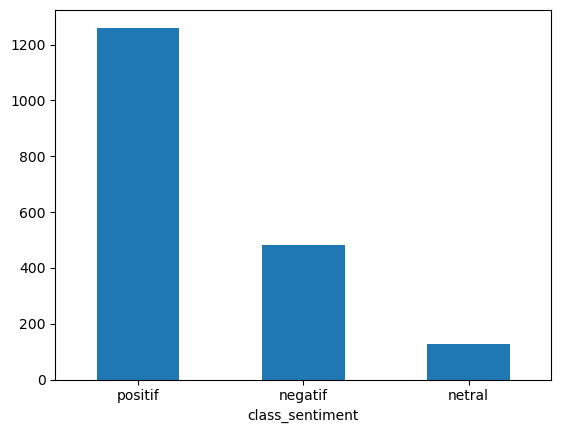

In [ ]:
data['class_sentiment'].value_counts().plot(kind='bar')

plt.xticks(rotation=0)

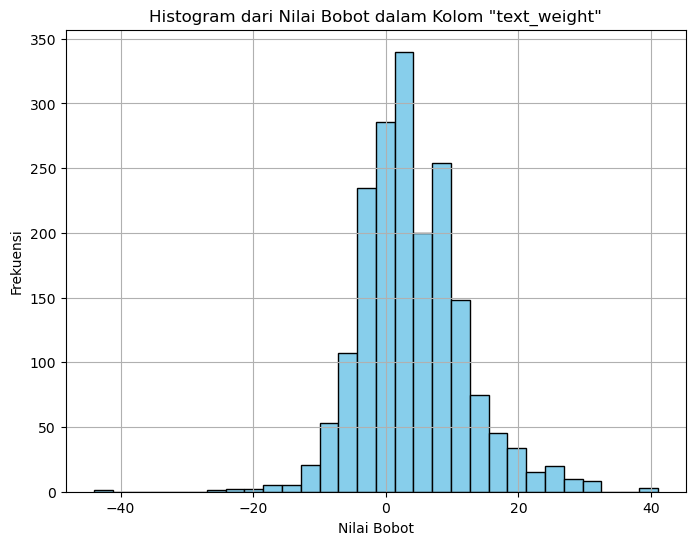

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['text_weight'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram dari Nilai Bobot dalam Kolom "text_weight"')
plt.xlabel('Nilai Bobot')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

## Train and Test Split

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['full_text'], data['text_weight_label'], test_size=0.3, shuffle=True)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')

tokenizer.fit_on_texts(data['full_text'])

# Konversi teks menjadi sequence
data_sequences = tokenizer.texts_to_sequences(data['full_text'])

padded_train = pad_sequences(data_sequences)

# Menampilkan hasil sequence
print(padded_train)

# tokenizer.fit_on_texts(Train_X)
# tokenizer.fit_on_texts(Test_X)

# sekuens_train = tokenizer.texts_to_sequences(Train_X)
# sekuens_test = tokenizer.texts_to_sequences(Test_X)

# padded_train = pad_sequences(sekuens_train)
# padded_test = pad_sequences(sekuens_test)

[[   0    0    0 ...  250  199  192]
 [   0    0    0 ...  270 1244 1245]
 [   0    0    0 ...   56    6  756]
 ...
 [   0    0    0 ...  333 1431    2]
 [   0    0    0 ...   93   42    2]
 [   0    0    0 ... 1020    2  218]]


In [ ]:
print(f'Jumlah data dalam train set: {len(Train_X)}')
print(f'Jumlah data dalam validation set: {len(Test_X)}')
print(f'Jumlah data dalam train set: {len(Train_Y)}')
print(f'Jumlah data dalam validation set: {len(Test_Y)}')

Jumlah data dalam train set: 1309
Jumlah data dalam validation set: 561
Jumlah data dalam train set: 1309
Jumlah data dalam validation set: 561


In [ ]:
print(Train_Y)

1522    1
741    -1
1099    1
803     1
2057    1
       ..
1883    1
1618    1
981     1
779    -1
1387    1
Name: text_weight_label, Length: 1309, dtype: int64


## Vectorization

In [ ]:
Encoder = LabelEncoder()

Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
print(Train_Y)

[2 0 2 ... 2 0 2]


In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['full_text'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Train_X.head()

1522    nama pasang prabowo subianto gibran rakabuming...
741     musnah surat suara milu buleleng singaraja kom...
1099    pbnu izin kelola tambang hubung imbal bantu pr...
803     hai yuk unggah foto seru hak pilih unggah foto...
2057    milu presden sender arti nyoblos eh iya ktp ny...
Name: full_text, dtype: object

## Klasifikasi

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, Train_Y)


MultinomialNB()

## Evaluasi

In [ ]:
predictions_NB = Naive.predict(Test_X_Tfidf)

print(confusion_matrix(predictions_NB,Test_Y))
print ("Classification: ",classification_report(Test_Y,predictions_NB))

[[ 23   2   2]
 [  0   0   0]
 [111  45 378]]
Classification:                precision    recall  f1-score   support

           0       0.85      0.17      0.29       134
           1       0.00      0.00      0.00        47
           2       0.71      0.99      0.83       380

    accuracy                           0.71       561
   macro avg       0.52      0.39      0.37       561
weighted avg       0.68      0.71      0.63       561



c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
print("Naive Bayes Accuracy Score -> ", accuracy_score(predictions_NB, Test_Y))

Naive Bayes Accuracy Score ->  0.714795008912656


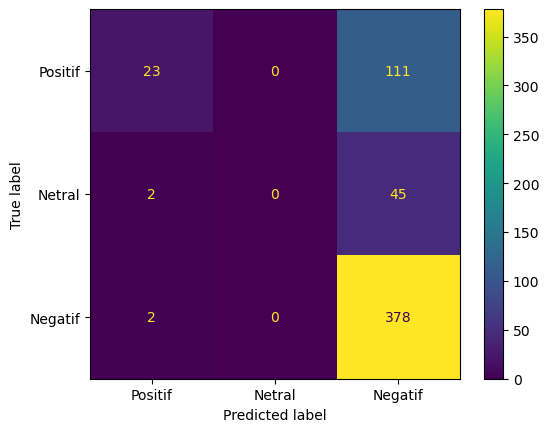

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Test_Y, predictions_NB)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()